In [3]:
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
import scipy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
def output_file(a, idx2name, c_idx):
    dirpath = os.getcwd()
    node_file = dirpath + '//nodes.csv'
    edge_file = dirpath + '//edges.csv'

    with open(edge_file, 'w') as fid:
        fid.write('Source\tTarget\n')
        for i in range(len(a)):
            fid.write(f'{a[i,0]}\t{a[i,1]}\n')

    with open(node_file, 'w') as fid:
        fid.write('Id\tLabel\tColor\n')
        for i in range(len(idx2name)):
            fid.write(f'{i}\t{idx2name[i]}\t{c_idx[i]}\n')
            
def read_team_name():
    # read inverse_teams.txt file
    f_path = abspath("Data/inverse_teams.txt")
    idx2name = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                name = line.split("\t", 1)[1]
                idx2name.append(name[:-1])
    return idx2name

def import_graph():
    # read the graph from 'play_graph.txt'
    f_path = abspath("Data/play_graph.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)

In [5]:
# spectral clustering
n = 321  # Total number of teams/nodes
k = 10   # No. of clusters to group them into

# load the graph
a = import_graph()

i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()

A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
A = (A + np.transpose(A))/2
A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
L = D @ A @ D
L = np.array(L)

v, x= np.linalg.eig(L)
idx_sorted = np.argsort(v)

x = x[:, idx_sorted[-k:]].real.astype(np.float32) # Eigen vectors for the k largest eigen values 

x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

In [6]:
a.shape

(1529, 2)

In [7]:
i = a[:, 0]-1
j = a[:, 1]-1

a[:,0]

array([  1,   3,   5, ..., 221,  90,  82])

In [8]:
I = np.identity(n)
L_sym = I - L
vsym, xsym = np.linalg.eig(L_sym)

In [9]:
# k-means
kmeans = KMeans(n_clusters=k).fit(x)
#kmeans = KMeans(n_clusters=k, random_state=3425).fit(x)
c_idx = kmeans.labels_

# show cluster
idx2name = read_team_name()
for i in range(k):
    print(f'Cluster {i+1}\n***************')
    idx = [index for index, t in enumerate(c_idx) if t == i]
    for index in idx:
        print(idx2name[index])
    print('\n')

Cluster 1
***************
Minnesota
Northern Illinois
C. Michigan
Akron
Tulane
Tulsa
Rutgers
Temple
Connecticut
Michigan St.
Bowling Green
W. Kentucky
Texas-San Antonio
Houston
Penn St.
UCF
Pittsburgh
W. Michigan
Purdue
Iowa
Ohio St.
UAB
Michigan
Iowa St.
Illinois
Indiana
Ball St.
Massachusetts
Northwestern
FAU
Nebraska
Old Dominion
Marshall
Miami (Ohio)
Maryland
Rice
Buffalo
West Virginia
E. Michigan
Ohio
Kent St.
TCU
Memphis
Louisiana Tech
Oklahoma
FIU
South Florida
M. Tenn. St.
Texas Tech
Toledo
Kansas St.
Southern Miss
UTEP
North Texas
Texas
Oklahoma St.
East Carolina
Wisconsin
SMU
Baylor
Army
Kansas
Cincinnati


Cluster 2
***************
Sam Houston St.
E. Washington
Abil Chr.
Northwestern St.
Idaho State
Cal-Poly
North Dakota
Weber St.
Nicholls St.
So. Utah
UC-Davis
Portland St.
Montana
Montana St.
Sacramento St.
Incarnate Word
N. Arizona
Cent. Arkansas
S.F. Austin
Lamar
SE Louisiana
Montana-Western
Texas College
McNeese St.
Central Washington
McMurry University
Houston Baptist
F

In [10]:
cluster1 = ['Virginia-Lynchburg',
'Alcorn St.',
'Faith U.',
'Mississippi Valley St.',
'Southern',
'Ark.-Pine Bluff',
'Jackson St.',
'Alabama St.',
'Grambling',
'Alabama A&M',
'Prairie View A&M',
'Texas Southern',
'Tuskegee',
'Concordia',
'Central Methodist',
'Stillman College',
'Louisiana College',
'Central State (Ohio)']

In [11]:
cluster2 = ['Georgia State',
'Texas A&M',
'South Carolina',
'Wake Forest',
'La.-Monroe',
'Ole Miss',
'New Mexico St.',
'Vanderbilt',
'Syracuse',
'Virginia',
'Pittsburgh',
'Navy',
'Troy',
'UAB',
'Appalachian St.',
'Kentucky',
'Georgia Tech',
'Ga. Southern',
'N. Carolina St.',
'Boston College',
'Missouri',
'Alabama',
'Virginia Tech',
'Arkansas',
'Auburn',
'Clemson',
'Georgia',
'Duke',
'North Carolina',
'UL Lafayette',
'Arkansas St.',
'Texas State',
'Mississippi St.',
'Florida St.',
'LSU',
'Tennessee',
'Miami (Fla.)',
'Louisville',
'South Alabama',
'Florida',
'Idaho']

#### Plotting the k largest Eigen Values (Largest to Smallest)

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


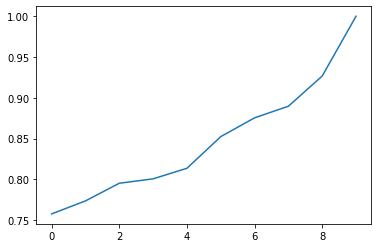

In [10]:
## Plot of the k largest Eigen values of the Laplacian variant
plt.plot(v[idx_sorted[-k:]])

# Plot of k smallest eigen values 
#plt.plot(v[idx_sorted[:k]])

#### Plotting the k largest Eigen Values (Smallest to Largest)

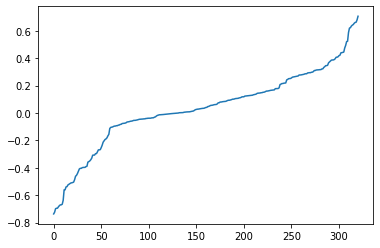

In [12]:
# Smallest to largest eigen vector
plt.plot(x[np.argsort(x[:, 0]),0])

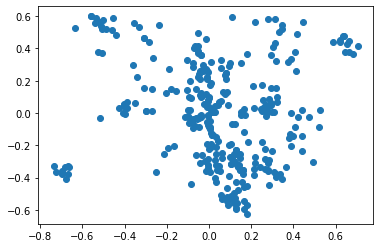

In [11]:
# scatter
plt.scatter(x[:, 0], x[:, 1])
plt.show()

#### END OF NOTEBOOK

Code reference: From Computational Data Analytics Coursework.